In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
boston_reviews = pd.read_csv('boston/reviews.csv')
boston_listings = pd.read_csv('boston/listings.csv')
boston_calendar = pd.read_csv('boston/calendar.csv')

In [4]:
#clean up data to calculate for average pricing for Boston
boston_listings['price'] = boston_listings['price'].str.replace('$', '')
boston_listings['price'] = boston_listings['price'].str.replace(',', '')
boston_listings['price'] = boston_listings['price'].astype(float)
boston_listings['price'].mean()

/var/folders/xh/hfqxf1xx32b_wlmnwcqbn8400000gn/T/ipykernel_5938/920469323.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  boston_listings['price'] = boston_listings['price'].str.replace('$', '')


173.9258019525802

In [23]:
seattle_listings = pd.read_csv('seattle/listings.csv')
seattle_reviews = pd.read_csv('seattle/reviews.csv')
seattle_calendar = pd.read_csv('seattle/calendar.csv')

In [6]:
#clean up data to calculate for average pricing for Seattle
seattle_listings['price'] = seattle_listings['price'].str.replace('$', '')
seattle_listings['price'] = seattle_listings['price'].str.replace(',', '')
seattle_listings['price'] = seattle_listings['price'].astype(float)
seattle_listings['price'].mean()

/var/folders/xh/hfqxf1xx32b_wlmnwcqbn8400000gn/T/ipykernel_5938/3663954127.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  seattle_listings['price'] = seattle_listings['price'].str.replace('$', '')


127.97616553169199

In [7]:
#determine the prices in comparison between each other
df_combine_prices = pd.concat([boston_listings.price.rename("boston"),seattle_listings.price.rename("seattle")], axis=1)

<AxesSubplot:title={'center':'Seattle vs Boston Airbnb'}, xlabel='City', ylabel='Price in $'>

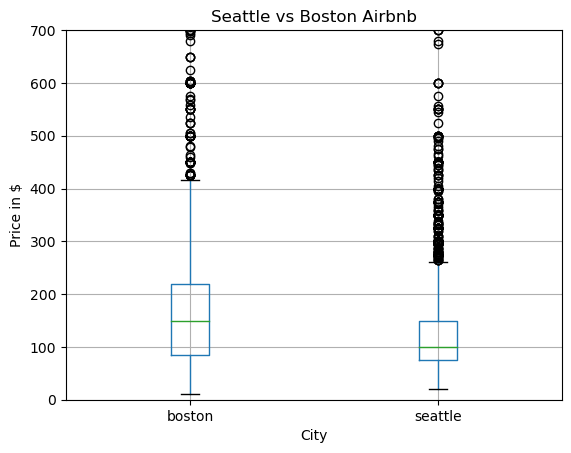

In [8]:
#box plot to compare between Boston and Seattle prices
plt.ylim(0,700)
plt.title('Seattle vs Boston Airbnb')
plt.ylabel('Price in $')
plt.xlabel('City')
df_combine_prices.boxplot()

In [10]:
#determine if there is anything about the properties that makes one more expensive than the other in Boston
boston_listings['host_is_superhost'].value_counts()

f    3178
t     407
Name: host_is_superhost, dtype: int64

In [11]:
#calculate % of superhost in Boston
boston_listings_superhost = 407/(3178+407)
boston_listings_superhost

0.11352859135285913

In [12]:
#determine if there is anything about the properties that makes one more expensive than the other in Seattle
seattle_listings['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [13]:
#calculate % of superhost in Seattle
seattle_listings_superhost = 778/(3038+778)
seattle_listings_superhost

0.2038784067085954

In [15]:
#find positive or negative reviews based on comments in Boston
boston_reviews['comments'].str.contains('good|great').value_counts()

False    37072
True     31150
Name: comments, dtype: int64

In [19]:
#calculate % of good comments
boston_reviews_comments = 31150/(37072+31150)
boston_reviews_comments

0.456597578493741

In [20]:
#find positive or negative reviews based on comments in Seattle
seattle_reviews['comments'].str.contains('good|great').value_counts()

True     43002
False    41829
Name: comments, dtype: int64

In [21]:
#find % of positive reviews based on comments in Seattle
seattle_reviews_comments = 43002/(41829+41829)
seattle_reviews_comments

0.5140213727318368

In [28]:
#determine how many airbnb's are available in Seattle
seattle_calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [34]:
#calculate the percentage for available homes in seattle
seattle_calendar_available = 934542/1393570
seattle_calendar_available

0.6706100160020666

In [31]:
#determine how many airbnb's are available in Boston
boston_calendar['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [35]:
#calculate the percentage for available homes in Boston
boston_calendar_available = 643037/1308890
boston_calendar_available


0.4912842179251121

In [37]:
#replace entire column with a value for city in Boston and Seattle b/c different cities are in Boston and Seattle
boston_listings['city'] = 'Boston'
seattle_listings['city'] = 'Seattle'

<AxesSubplot:>

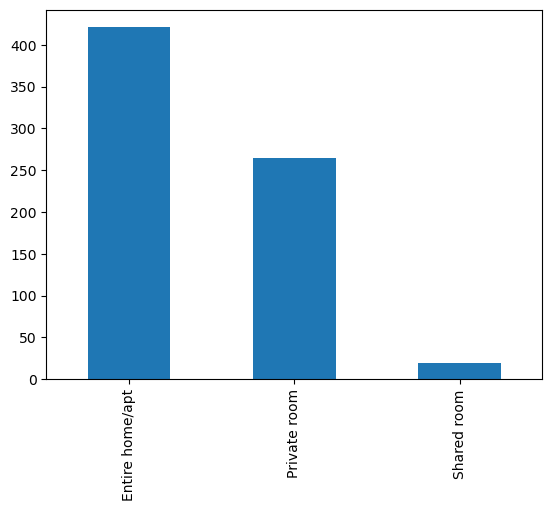

In [46]:
#get the room type for each neighbourhood and plot it for Seattle
seattle_listings.groupby('neighbourhood')['room_type'].head(10).value_counts().plot(kind='bar')


<AxesSubplot:>

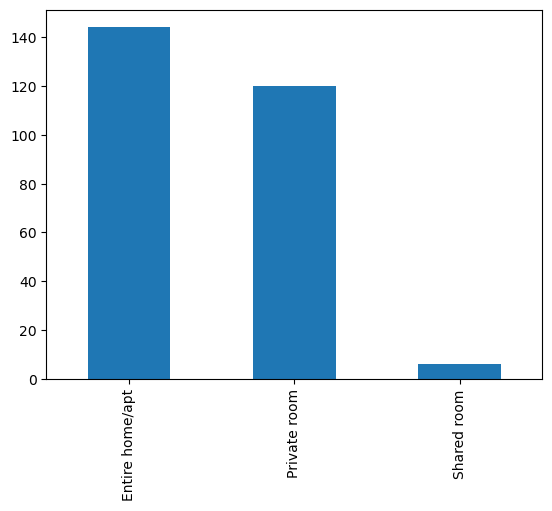

In [48]:
#get the room type and plot it for Boston
boston_listings.groupby('neighbourhood')['room_type'].head(10).value_counts().plot(kind='bar')